In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing the Dataset

In [5]:
movies = pd.read_csv("movies_cleaned",index_col="Unnamed: 0")

movies.head()

,name,release_year,genre,synopsis,rating,director,stars,runtime,votes,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",A woman with a mysterious illness is forced in...,6.10,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",121.0,21062.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",The war for Eternia begins again in what may b...,5.00,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",25.0,17870.0,NaN
2,The Walking Dead,2010,"Drama, Horror, Thriller",Sheriff Deputy Rick Grimes wakes up from a com...,8.20,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride...",44.0,885805.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",An animated series that follows the exploits o...,9.20,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer...",23.0,414849.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror","A prequel, set before the events of Army of th...",6.59,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",NaN,NaN,NaN


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5911 entries, 0 to 9543
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5911 non-null   object 
 1   release_year  5911 non-null   int64  
 2   genre         5890 non-null   object 
 3   synopsis      5911 non-null   object 
 4   rating        5911 non-null   float64
 5   director      3330 non-null   object 
 6   stars         5782 non-null   object 
 7   runtime       5067 non-null   float64
 8   votes         5516 non-null   float64
 9   Gross         452 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 508.0+ KB


In [8]:
movies.describe(include="all")

,name,release_year,genre,synopsis,rating,director,stars,runtime,votes,Gross
count,5911,5911.000000,5890,5911,5911.000000,3330,5782,5067.000000,5.516000e+03,452.000000
unique,5911,NaN,501,5696,NaN,2739,5661,NaN,NaN,NaN
top,Blood Red Sky,NaN,Comedy,Add a Plot,NaN,Jay Karas,Dave Chappelle,NaN,NaN,NaN
freq,1,NaN,627,215,NaN,16,6,NaN,NaN,NaN
mean,NaN,2015.363390,NaN,NaN,6.594037,NaN,NaN,75.102112,2.187453e+04,43.911394
std,NaN,8.274064,NaN,NaN,1.173472,NaN,NaN,35.007485,8.414396e+04,82.596349
min,NaN,1932.000000,NaN,NaN,1.100000,NaN,NaN,1.000000,5.000000e+00,0.000000
25%,NaN,2014.000000,NaN,NaN,5.900000,NaN,NaN,45.000000,4.080000e+02,0.157500
50%,NaN,2017.000000,NaN,NaN,6.600000,NaN,NaN,83.000000,1.660500e+03,6.420000
75%,NaN,2019.000000,NaN,NaN,7.400000,NaN,NaN,100.000000,7.656250e+03,47.492500


# Data Visualisation

Conduct Data Visualisation to find out how different factors affect a movies rating

## 1. Correlation analysis

## Runtime vs Rating

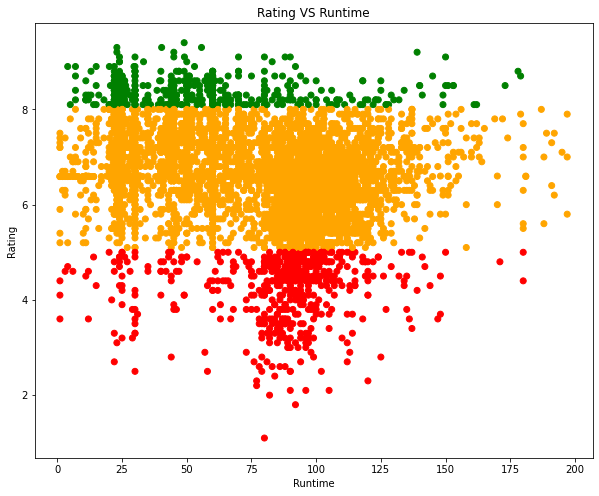

In [21]:
fig, ax_run_rat = plt.subplots(figsize=(10, 8))
run_rat_colors = np.where(movies["rating"] > 8, "green", 
                          np.where(movies["rating"] > 5, "orange", "red"))


ax_run_rat.scatter(x=movies['runtime'], y=movies["rating"], c=run_rat_colors)

ax_run_rat.set_title("Rating VS Runtime")
ax_run_rat.set_xlabel("Runtime")
ax_run_rat.set_ylabel("Rating")

plt.show()

#### Insights:
1. Movies/TV Series with longer runtime tend to get scores between 5-8
2. Movies/TV Series with lower ratings tend t have a runtime between 75-125
3. Movies/TV Series with High Ratings tend to last under 2 hours

## Votes vs Rating

C:\Users\TRISTA~1\AppData\Local\Temp/ipykernel_27220/1607957348.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_vot_rat.set_yticklabels(ytick_labels)


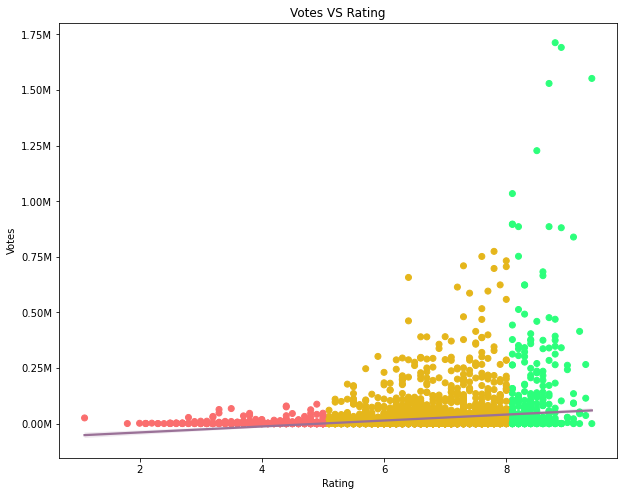

In [56]:
fig, ax_vot_rat = plt.subplots(figsize=(10, 8))

ytick_labels = ["0.00M", "0.00M", "0.25M", "0.50M", "0.75M", "1.00M", "1.25M", "1.50M", "1.75M"]

vot_rat_colors = np.where(movies["rating"] > 8, "#2cff7b", 
                          np.where(movies["rating"] > 5, "#e5b61b", "#fa6e6e"))

ax_vot_rat.scatter(y=movies['votes'], x=movies["rating"], c=vot_rat_colors)
sns.regplot(y=movies['votes'], x=movies["rating"], color="#9A7197", scatter=False)

ax_vot_rat.set_title("Votes VS Rating")

ax_vot_rat.set_yticklabels(ytick_labels)
ax_vot_rat.set_xlabel("Rating")
ax_vot_rat.set_ylabel("Votes")

plt.show()

#### Insights:
1. Votes and Rating have a weak positive correlation. (As the number of votes increases, Rating increases)
2. Movies with over 750k votes have high ratings
3. Movies with under 250k votes have the lowest ratings

## Gross Earnings vs Rating

C:\Users\TRISTA~1\AppData\Local\Temp/ipykernel_27220/3401724513.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_gross_rat.set_yticklabels(ytick_labels)


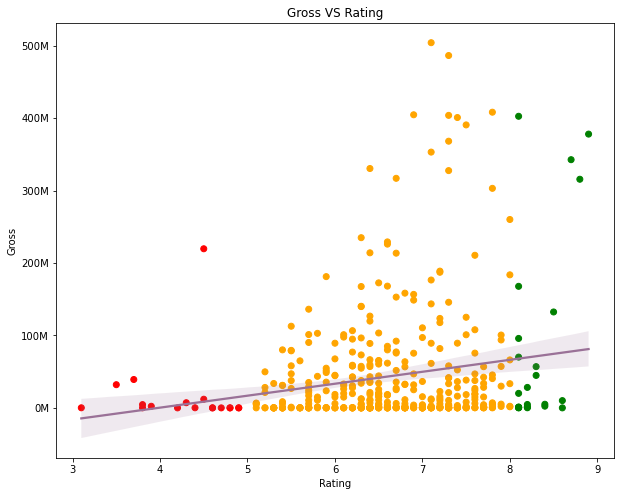

In [61]:
fig, ax_gross_rat = plt.subplots(figsize=(10, 8))
gross_rat_colors = np.where(movies["rating"] > 8, "green", 
                          np.where(movies["rating"] > 5, "orange", "red"))

ytick_labels = ["0M", "0M", "100M", "200M", "300M", "400M", "500M"]


ax_gross_rat.scatter(y=movies['Gross'], x=movies["rating"], c=gross_rat_colors)
sns.regplot(y=movies['Gross'], x=movies["rating"], color="#9A7197", scatter=False)
ax_gross_rat.set_title("Gross VS Rating")
ax_gross_rat.set_yticklabels(ytick_labels)
ax_gross_rat.set_xlabel("Rating")
ax_gross_rat.set_ylabel("Gross")

plt.show()

#### Insights:
1. Gross and Rating have a weak positive correlation.
2. However, movies with a significantly higher gross tend to have mid ratings (5-8).

## Numerical Columns Pairplot

In [64]:
numericals = movies[["Gross", "rating", "votes", "runtime"]]

numericals.head()

,Gross,rating,votes,runtime
0,NaN,6.10,21062.0,121.0
1,NaN,5.00,17870.0,25.0
2,NaN,8.20,885805.0,44.0
3,NaN,9.20,414849.0,23.0
4,NaN,6.59,NaN,NaN


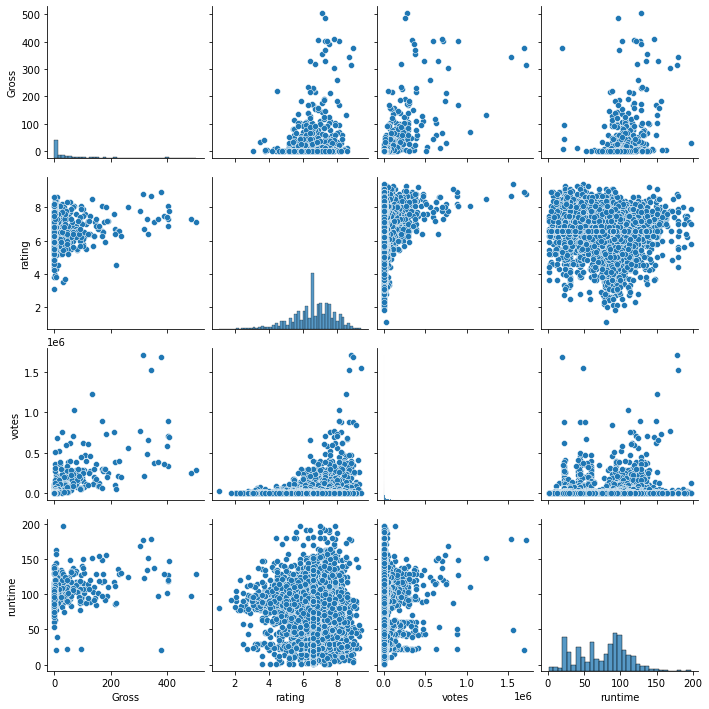

In [67]:
sns.pairplot(data=numericals)